In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [301]:
df1 = pd.read_csv('meteo.csv', sep=',', engine='python')
df1.head()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,H. suelo 60,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego
0,06/01/2018,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,0.23,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0
1,06/01/2018,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,0.23,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0
2,06/01/2018,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,0.23,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0
3,06/01/2018,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,0.23,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0
4,06/01/2018,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,0.24,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0


In [302]:
df1.dtypes

Date                 object
Time                 object
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
H. suelo 60         float64
Result2_Avg         float64
T. suelo 60 cm      float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego               float64
dtype: object

In [303]:
#Esto es relevante para la parte dos
df1['albedo_Avg'] = df1['albedo_Avg'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [304]:
# para hacer la variable de fecha
df1["FECHA"] = df1["Date"] +" "+ df1["Time"]
df1['FECHA'] = pd.to_datetime(df1.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df1.drop( ["Date","Time"], axis=1, inplace=True )
df1.dtypes

batt_volt_Min              float64
logger_temp                float64
short_up_Avg               float64
short_dn_Avg               float64
long_up_Avg                float64
long_dn_Avg                float64
cnr4_T_C_Avg               float64
cnr4_T_K_Avg               float64
long_up_corr_Avg           float64
long_dn_corr_Avg           float64
Rs_net_Avg                 float64
Rl_net_Avg                 float64
albedo_Avg                 float64
Rn_Avg                     float64
AirTC_Avg                  float64
RH                         float64
WS_ms_S_WVT                float64
WindDir_D1_WVT             float64
WindDir_SD1_WVT            float64
Temp_C_Avg(1)              float64
Temp_C_Avg(2)              float64
Temp_C_Avg(3)              float64
Temp_C_Avg(4)               object
H. suelo 60                float64
Result2_Avg                float64
T. suelo 60 cm             float64
Result4_Avg                float64
Result5_Avg                float64
Result6_Avg         

In [305]:
# quedandonos con los datos que utilizaremos
dfm = df1.filter(['FECHA','WS_ms_S_WVT','AirTC_Avg','RH','Rn_Avg','albedo_Avg'],axis=1)
dfm.head()

,FECHA,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg
0,2018-01-06 17:00:00,2.33,27.75,20.61,1.79,0.00
1,2018-01-06 17:30:00,3.12,26.57,25.25,-18.59,0.00
2,2018-01-06 18:00:00,2.54,25.01,26.45,-35.10,0.00
3,2018-01-06 18:30:00,2.01,23.65,29.22,-40.13,-0.16
4,2018-01-06 19:00:00,2.14,22.84,31.08,-39.46,-0.15


In [306]:
# Agregamos la variable de mes y día
dfm['MES'] = dfm['FECHA'].dt.month
dfm['DIA'] = dfm['FECHA'].dt.day
dfm.head()

,FECHA,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg,MES,DIA
0,2018-01-06 17:00:00,2.33,27.75,20.61,1.79,0.00,1.0,6.0
1,2018-01-06 17:30:00,3.12,26.57,25.25,-18.59,0.00,1.0,6.0
2,2018-01-06 18:00:00,2.54,25.01,26.45,-35.10,0.00,1.0,6.0
3,2018-01-06 18:30:00,2.01,23.65,29.22,-40.13,-0.16,1.0,6.0
4,2018-01-06 19:00:00,2.14,22.84,31.08,-39.46,-0.15,1.0,6.0


In [307]:
# A continuación se busca encontrar los promedios para 
# Latitud (º N)
# Longitud (º O)
# Elevación (m)
# Velocidad del Viento (WS_ms_S_WVT en m/s)
# Tmax (Max de  AirTC_Avg en ºC)
# Tmin (Min de  AirTC_Avg en ºC)
# RHmax (Max de RH en %)
# RHmin (Min de RH en %)
# RHmean (Promedio de RH en %)
# Rs (Radiación neta Rn_Avg en MJ/m2/día)

In [308]:
# agregando al dataframe las columnas que nos interesan
dfm_mes = pd.DataFrame()
dfm_mes['V_Viento(m/s)'] = np.round(dfm.groupby(["MES"])["WS_ms_S_WVT"].transform("mean"), decimals=2)
dfm_mes['Tmax'] = np.round(dfm.groupby(["MES"])["AirTC_Avg"].transform("max"), decimals=2)
dfm_mes['Tmin'] = np.round(dfm.groupby(["MES"])["AirTC_Avg"].transform("min"), decimals=2)
dfm_mes['Tprom'] = np.round(dfm.groupby(["MES"])["AirTC_Avg"].transform("mean"), decimals=2)
dfm_mes['RHmax'] = np.round(dfm.groupby(["MES"])["RH"].transform("max"), decimals=2)
dfm_mes['RHmin'] = np.round(dfm.groupby(["MES"])["RH"].transform("min"), decimals=2)
dfm_mes['RHprom'] = np.round(dfm.groupby(["MES"])["RH"].transform("mean"), decimals=2)
dfm_mes['Radiación'] = np.round(dfm.groupby(["MES"])["Rn_Avg"].transform("mean"), decimals=2)
dfm_mes['Albedo'] = np.round(dfm.groupby(["MES"])["albedo_Avg"].transform("mean"), decimals=2)

dfm_mes=dfm_mes.drop_duplicates(subset=['V_Viento(m/s)','Tmax','Tmin','Tprom','RHmax','RHmin','RHprom','Radiación','Albedo'])
dfm_mes


,V_Viento(m/s),Tmax,Tmin,Tprom,RHmax,RHmin,RHprom,Radiación,Albedo
0,1.94,33.35,0.54,16.96,91.60,5.98,38.47,34.73,-0.42
1214,1.96,31.47,0.07,17.23,99.53,6.76,48.17,56.25,-0.48
2558,1.93,35.22,3.06,19.28,89.73,6.76,36.97,92.89,-0.41
4046,2.10,36.30,5.43,21.88,93.40,5.23,40.79,134.01,-0.39
5486,2.11,38.18,7.13,23.65,94.60,8.19,44.23,162.41,-0.37
6974,2.15,41.47,13.12,28.42,98.37,5.34,50.81,163.93,-0.38
8414,2.02,44.94,18.71,31.07,97.00,13.10,57.64,157.53,-0.19
9902,1.91,40.24,22.71,30.12,98.60,30.16,68.87,151.27,-0.38
11390,1.79,41.39,19.43,29.66,98.03,21.32,66.62,136.75,-0.49
12830,1.66,35.82,10.23,23.25,98.47,17.32,68.70,95.51,-0.61


In [309]:
dfm_mes = dfm_mes.drop(dfm.index[17247]).reset_index(drop=True)

In [310]:
mes=["Enero",'Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
dfm_mes['MES']=mes
dfm_mes

,V_Viento(m/s),Tmax,Tmin,Tprom,RHmax,RHmin,RHprom,Radiación,Albedo,MES
0,1.94,33.35,0.54,16.96,91.60,5.98,38.47,34.73,-0.42,Enero
1,1.96,31.47,0.07,17.23,99.53,6.76,48.17,56.25,-0.48,Febrero
2,1.93,35.22,3.06,19.28,89.73,6.76,36.97,92.89,-0.41,Marzo
3,2.10,36.30,5.43,21.88,93.40,5.23,40.79,134.01,-0.39,Abril
4,2.11,38.18,7.13,23.65,94.60,8.19,44.23,162.41,-0.37,Mayo
5,2.15,41.47,13.12,28.42,98.37,5.34,50.81,163.93,-0.38,Junio
6,2.02,44.94,18.71,31.07,97.00,13.10,57.64,157.53,-0.19,Julio
7,1.91,40.24,22.71,30.12,98.60,30.16,68.87,151.27,-0.38,Agosto
8,1.79,41.39,19.43,29.66,98.03,21.32,66.62,136.75,-0.49,Septiembre
9,1.66,35.82,10.23,23.25,98.47,17.32,68.70,95.51,-0.61,Octubre


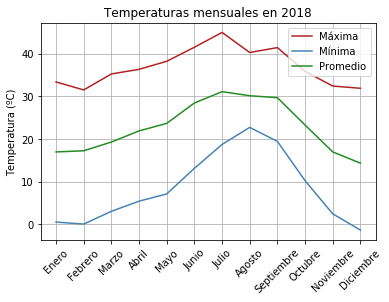

In [311]:
# Temperaturas máxima, mínima y promedio
X = mes                 
N = np.arange(12)         
Ymax = dfm_mes['Tmax']     
Ymin = dfm_mes['Tmin']     
Yprom = dfm_mes['Tprom']     


plt.plot(Ymax, label = 'Máxima', color = 'firebrick')   
plt.plot(Ymin, label = 'Mínima', color = 'steelblue')   
plt.plot(Yprom, label = 'Promedio', color = 'forestgreen')   

plt.xticks(N, X, size = 'medium', rotation = 45)  
plt.ylabel("Temperatura (ºC)")  
plt.legend()
plt.grid()
plt.title('Temperaturas mensuales en 2018')
plt.show()

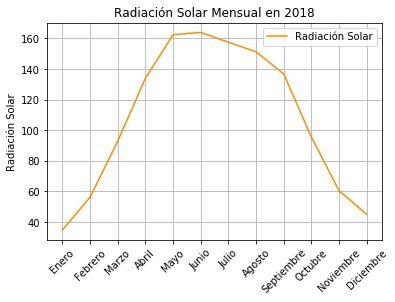

In [312]:
# Radiación solar
X = mes                 
N = np.arange(12)         
Rad = dfm_mes['Radiación']     

plt.plot(Rad, label = 'Radiación Solar', color = 'darkorange')   

plt.xticks(N, X, size = 'medium', rotation = 45)  
plt.ylabel("Radiación Solar")  
plt.legend()
plt.grid()
plt.title('Radiación Solar Mensual en 2018')
plt.show()

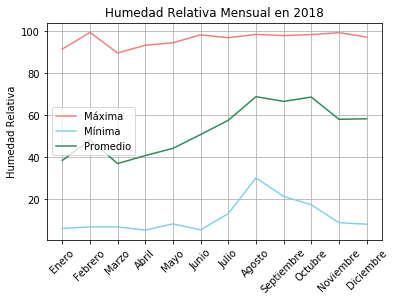

In [313]:
# Humedar Relativa; máxima, mínima y promedio
X = mes                 
N = np.arange(12)         
Ymax = dfm_mes['RHmax']     
Ymin = dfm_mes['RHmin']     
Yprom = dfm_mes['RHprom']     


plt.plot(Ymax, label = 'Máxima', color = 'lightcoral')   
plt.plot(Ymin, label = 'Mínima', color = 'skyblue')   
plt.plot(Yprom, label = 'Promedio', color = 'seagreen')   

plt.xticks(N, X, size = 'medium', rotation = 45)  
plt.ylabel("Humedad Relativa")  
plt.legend()
plt.grid()
plt.title('Humedad Relativa Mensual en 2018')
plt.show()

In [314]:
# PARA LA PARTE DOS

In [315]:
# Ec 07 - Jansen & Haise (1963), ETo =(0.0252T + 0.078)Rs 
EvapT07 = []
for i in range (0,len(dfm_mes)):
    ET = (0.0252*dfm_mes['Tprom'][i]+0.078)*dfm_mes['Radiación'][i]
    EvapT07.append(ET)
EvapT07

[17.55226416,
 28.811025,
 52.37658384,
 84.34267775999999,
 109.46109179999998,
 130.19058312,
 135.62765892,
 126.61662048000001,
 112.877826,
 63.409088999999994,
 30.53078472,
 19.74265536]

In [316]:
# Ec 31 - Valiantzas 1 (2012), 
# ET0 = 0.0393Rs(Tmean + 9.5)^(0.5) - 0.19Rs^(0.6)\phi^(0.15)
# Con Latitud = 28º 55.117 N'
phi = (math.pi/180)*28
EvapT31 = []
for i in range (0,len(dfm_mes)):
    ET = 0.0393*dfm_mes['Radiación'][i]*(dfm_mes['Tprom'][i] + 9.5)**0.5
    - 0.19*(dfm_mes['Radiación'][i]**0.6)*(phi**0.15) + 0.0061*(dfm_mes['Tprom'][i] 
    + 20)*(1.12*dfm_mes['Tprom'][i] - dfm_mes['Tmin'][i] - 2)**0.7
    EvapT31.append(ET)
EvapT31

[7.020891371628937,
 11.42916642045282,
 19.58424835983492,
 29.50232393137234,
 36.74913178182897,
 39.67209667435578,
 39.432864572523435,
 37.41989744151673,
 33.63111196992265,
 21.48063163598326,
 12.208509056735116,
 8.62543236584084]

In [317]:
# Ec. 34,  Valiantzas 4 (2013): α es el albedo (Albedo_Avg),
# Ra es la radiación solar en la parte alta de la atmósfera (ver ecuación 21, 
# página 46 del Reporte FAO 56), u2 es la velocidad del viento a 2 m de altura (WS_ms_S_WVT), 
# z es la altura sobre el nivel mar. 

In [318]:
# Para determinar los parámetros necesarios para Ra se necesita que
dr = []
delta = []
omega = []

for i in range(0,len(dfm_mes)):
    J = int(30.4*i-15)
    dr0 = 1 + 0.033*math.cos(2*math.pi*J/365)
    delta0 = 0.0409*math.sin((2*math.pi*J/365)-1.39)
    omega0 = math.acos(-math.tan(phi)*math.tan(0.0409*math.sin((2*math.pi*J/365)-1.39)))
    
    dr.append(dr0)
    delta.append(delta0)
    omega.append(omega0)

In [319]:
# Cada valor es utilizado en el cálculo de Ra por lo que
CalcRa = pd.DataFrame()
CalcRa['dr'] = dr
CalcRa['delta'] = delta
CalcRa['omega'] = omega
CalcRa

,dr,delta,omega
0,1.031906,-0.040777,1.549101
1,1.031906,-0.037022,1.551101
2,1.023584,-0.023610,1.558240
3,1.008564,-0.003339,1.569021
4,0.991711,0.017225,1.579956
5,0.976615,0.033700,1.588722
6,0.968168,0.040749,1.592477
7,0.968023,0.037170,1.590570
8,0.976615,0.023321,1.583199
9,0.991162,0.003689,1.572758


In [320]:
# Ya teniendo todos los datos, se calcula Ra por mes
Ram = []
for i in range(0,len(dfm_mes)):
    Ra = (24*60/math.pi)*0.0820*CalcRa['dr'][i]*(CalcRa['omega'][i]*math.sin(phi)*math.sin(CalcRa['delta'][i])
    + math.cos(phi)*math.cos(CalcRa['delta'][i])*math.cos(CalcRa['omega'][i]))
    Ram.append(Ra)

In [321]:
CalcRa['Ra'] = Ram
CalcRa['Ra'] = CalcRa['Ra'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
CalcRa

,dr,delta,omega,Ra
0,1.031906,-0.040777,1.549101,-0.407594
1,1.031906,-0.037022,1.551101,-0.371418
2,1.023584,-0.023610,1.558240,-0.238029
3,1.008564,-0.003339,1.569021,-0.033809
4,0.991711,0.017225,1.579956,0.174803
5,0.976615,0.033700,1.588722,0.341831
6,0.968168,0.040749,1.592477,0.412336
7,0.968023,0.037170,1.590570,0.374872
8,0.976615,0.023321,1.583199,0.234363
9,0.991162,0.003689,1.572758,0.036958


In [322]:
# Para la ecuación 34
EvapT34 = []

for i in range(0,len(dfm_mes)):
    ET = 0.051*(1-albedo['Albedo'][i])*dfm_mes['Radiación'][i]*(dfm_mes['Tprom'][i]+9.5)**(0.5)
    -2.4*((dfm_mes['Radiación'][i])/(CalcRa['Ra'][i]))**2 + 0.048*(dfm_mes['Tprom'][i]+20)*(1-
    (dfm_mes['RHprom'][i])/100)*(0.5+0.536*dfm_mes['V_Viento(m/s)'][i])+0.00012*101
    EvapT34.append(ET)
EvapT34

[12.937734176421566,
 21.06107460990313,
 36.08883629056602,
 54.36535112239148,
 67.71939245903445,
 73.10568043656093,
 72.6648359374592,
 68.95544459833694,
 61.97366740106358,
 39.58339295363633,
 22.497206765617225,
 15.894499031404418]

In [323]:
# Para finalizar, podemos crear un dataframe para comparar datos de las distintas ecuaciones
Ecuaciones = {'Mes':mes, 'Ec_07':EvapT07, 'Ec_31':EvapT31, 'Ec_34':EvapT34}
Ecuaciones = pd.DataFrame(data=Ecuaciones)
Ecuaciones

,Mes,Ec_07,Ec_31,Ec_34
0,Enero,17.552264,7.020891,12.937734
1,Febrero,28.811025,11.429166,21.061075
2,Marzo,52.376584,19.584248,36.088836
3,Abril,84.342678,29.502324,54.365351
4,Mayo,109.461092,36.749132,67.719392
5,Junio,130.190583,39.672097,73.105680
6,Julio,135.627659,39.432865,72.664836
7,Agosto,126.616620,37.419897,68.955445
8,Septiembre,112.877826,33.631112,61.973667
9,Octubre,63.409089,21.480632,39.583393


In [324]:
# para la parte 3

In [325]:
df2 = pd.read_csv('flujos.csv', sep=',', engine='python')
df2.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1


In [326]:
df2 = df2.drop(df2.index[0]).reset_index(drop=True)
df2 = df2.filter(['Year','DoY','Hour','Rg_f','LE_f','H_f'],axis=1)
df2['Hour'] = df2['Hour'].astype(str)
df2.head()

,Year,DoY,Hour,Rg_f,LE_f,H_f
0,2018,7,0.5,-0.87,11.52,-20.04
1,2018,7,1,-0.97,15.11,-7.34
2,2018,7,1.5,-0.96,8.61,-9.76
3,2018,7,2,-2.06,1.93,-8.55
4,2018,7,2.5,-1.32,6.40,-0.55


In [327]:
# para sacar días a partir de la variable 'Hour'

hora = []
minuto = []

for i in range(0,len(df2)):
    if (len(str(df2['Hour'][i]))==1):
        hora.append(str(df2['Hour'][i])[0:1])
        minuto.append('00')
        
    if (len(str(df2['Hour'][i]))==2):
        if (str(df2['Hour'][i])[0:2]=='24'):
            hora.append('00')
            minuto.append('00')
        else:
            hora.append(str(df2['Hour'][i])[0:2])
            minuto.append('00')
            
    elif (len(str(df2['Hour'][i]))==3):
        hora.append(str(df2['Hour'][i])[0:1])
        minuto.append('30')
    elif (len(str(df2['Hour'][i]))==4):
        hora.append(str(df2['Hour'][i])[0:2])
        minuto.append('30')
        

In [328]:
dia = []

for i in range(0,len(df2)):
    d = df2['DoY'][i]
    dia.append(d)

In [329]:
x = {'DIA': dia, 'HORA':hora, 'MINUTO':minuto}
dhm = pd.DataFrame(x)
dhm.head()

,DIA,HORA,MINUTO
0,7,0,30
1,7,1,00
2,7,1,30
3,7,2,00
4,7,2,30


In [330]:
dhm.dtypes

DIA       object
HORA      object
MINUTO    object
dtype: object

In [331]:
dhm['DIA'] = dhm['DIA'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [332]:
dhm.dtypes

DIA        int64
HORA      object
MINUTO    object
dtype: object

In [333]:
dia = []
for i in range(0,len(dhm)):
    if (dhm['HORA'][i]=='00' and dhm['MINUTO'][i]=='00'):
        dia.append(dhm['DIA'][i] +1)
    else:
        dia.append(dhm['DIA'][i])
dhm['DIA']=dia
dhm.head()

,DIA,HORA,MINUTO
0,7,0,30
1,7,1,00
2,7,1,30
3,7,2,00
4,7,2,30


In [334]:
Fecha = []
for i in range(0,len(df2)):
    date = '2018 '+str(dhm['DIA'][i])+ ' '+ dhm['HORA'][i]+ ' '+dhm['MINUTO'][i]
    Fecha.append(date)

In [335]:
FECHA = []
for i in range(0,len(df2)):
    d=datetime.datetime.strptime(Fecha[i],'%Y %j %H %M')
    F = d.isoformat(' ')
    FECHA.append(F)

In [336]:
df2 = df2.apply(pd.to_numeric, errors='coerce')
df2.dtypes

Year      int64
DoY       int64
Hour    float64
Rg_f    float64
LE_f    float64
H_f     float64
dtype: object

In [337]:
df2['FECHA']=FECHA
df2.head()

,Year,DoY,Hour,Rg_f,LE_f,H_f,FECHA
0,2018,7,0.5,-0.87,11.52,-20.04,2018-01-07 00:30:00
1,2018,7,1.0,-0.97,15.11,-7.34,2018-01-07 01:00:00
2,2018,7,1.5,-0.96,8.61,-9.76,2018-01-07 01:30:00
3,2018,7,2.0,-2.06,1.93,-8.55,2018-01-07 02:00:00
4,2018,7,2.5,-1.32,6.40,-0.55,2018-01-07 02:30:00


In [338]:
df2['FECHA'] = pd.to_datetime(df2.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df2 = df2.drop(['Year','DoY','Hour'], 1)
df2.dtypes

Rg_f            float64
LE_f            float64
H_f             float64
FECHA    datetime64[ns]
dtype: object

In [339]:
df2['MES'] = df2['FECHA'].dt.month
df2['DIA'] = df2['FECHA'].dt.day
df2['HORA'] = df2['FECHA'].dt.hour

df2.dtypes

Rg_f            float64
LE_f            float64
H_f             float64
FECHA    datetime64[ns]
MES               int64
DIA               int64
HORA              int64
dtype: object

In [340]:
df2["Rg_f_prom"] =df2.groupby(["MES","DIA","HORA"])["Rg_f"].transform("mean")
df2["LE_f_prom"] =df2.groupby(["MES","DIA","HORA"])["LE_f"].transform("mean")
df2["H_f_prom"] =df2.groupby(["MES","DIA","HORA"])["H_f"].transform("mean")

df2=df2.drop_duplicates(subset=["Rg_f_prom",'LE_f_prom','H_f_prom'])
df2.head()

,Rg_f,LE_f,H_f,FECHA,MES,DIA,HORA,Rg_f_prom,LE_f_prom,H_f_prom
0,-0.87,11.52,-20.04,2018-01-07 00:30:00,1,7,0,-0.870,11.520,-20.040
1,-0.97,15.11,-7.34,2018-01-07 01:00:00,1,7,1,-0.965,11.860,-8.550
3,-2.06,1.93,-8.55,2018-01-07 02:00:00,1,7,2,-1.690,4.165,-4.550
5,-1.22,2.44,-2.92,2018-01-07 03:00:00,1,7,3,-1.180,2.420,-2.765
7,-1.74,2.49,-1.29,2018-01-07 04:00:00,1,7,4,-1.490,4.145,-4.680


In [341]:
# para diciembre
DIC=df2[df2['MES']==12]
DIC=DIC.reset_index(drop=True)
DIC.head()

,Rg_f,LE_f,H_f,FECHA,MES,DIA,HORA,Rg_f_prom,LE_f_prom,H_f_prom
0,-2.32,-0.72,-9.68,2018-12-01 00:00:00,12,1,0,-1.755,6.780,-3.295
1,-1.53,1.40,2.86,2018-12-01 01:00:00,12,1,1,-1.605,1.390,0.195
2,-1.61,-2.03,-15.32,2018-12-01 02:00:00,12,1,2,-1.850,-1.665,-14.965
3,-2.59,-2.82,-6.29,2018-12-01 03:00:00,12,1,3,-1.885,-1.995,-4.210
4,-0.95,0.76,1.54,2018-12-01 04:00:00,12,1,4,-1.320,0.410,-7.325


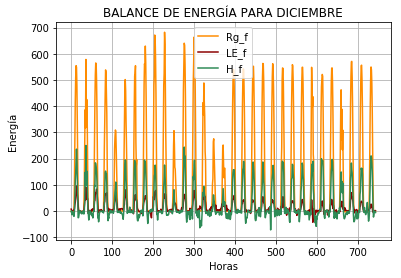

In [342]:
# BALANCE DE ENERGÍA PARA DICIEMBRE
Y1 = DIC['Rg_f_prom']          
Y2 = DIC['LE_f_prom']          
Y3 = DIC['H_f_prom']        

plt.plot(Y1, label = "Rg_f", color = 'darkorange')   
plt.plot(Y2, label = "LE_f", color = 'darkred')   
plt.plot(Y3, label = "H_f", color = 'seagreen')   
plt.xlabel("Horas")   
plt.ylabel("Energía")  
plt.legend()
plt.grid()
plt.title('BALANCE DE ENERGÍA PARA DICIEMBRE')
plt.show()

In [343]:
DIC1=DIC[DIC['DIA']==1]
DIC1=DIC1.reset_index(drop=True)
DIC1.head()

,Rg_f,LE_f,H_f,FECHA,MES,DIA,HORA,Rg_f_prom,LE_f_prom,H_f_prom
0,-2.32,-0.72,-9.68,2018-12-01 00:00:00,12,1,0,-1.755,6.780,-3.295
1,-1.53,1.40,2.86,2018-12-01 01:00:00,12,1,1,-1.605,1.390,0.195
2,-1.61,-2.03,-15.32,2018-12-01 02:00:00,12,1,2,-1.850,-1.665,-14.965
3,-2.59,-2.82,-6.29,2018-12-01 03:00:00,12,1,3,-1.885,-1.995,-4.210
4,-0.95,0.76,1.54,2018-12-01 04:00:00,12,1,4,-1.320,0.410,-7.325


In [344]:
h = []
for i in range(0,24):
    e=24
p    h.append(e)

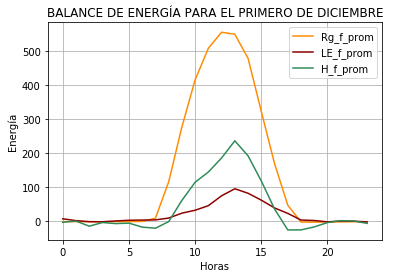

In [345]:
# BALANCE DE ENERGÍA PARA EL PRIMERO DE DIC.
h = []
for i in range(0,24):
    e=24
    h.append(e)

X = h                 
N = np.arange(24)         
Y1 = DIC1['Rg_f_prom']     
Y2 = DIC1['LE_f_prom']     
Y3 = DIC1['H_f_prom']      


plt.plot(Y1, label = 'Rg_f_prom', color = 'darkorange')   
plt.plot(Y2, label = 'LE_f_prom', color = 'darkred')   
plt.plot(Y3, label = 'H_f_prom', color = 'seagreen')   
plt.xlabel("Horas")   
plt.ylabel("Energía")  
plt.legend()
plt.grid()
plt.title('BALANCE DE ENERGÍA PARA EL PRIMERO DE DICIEMBRE')
plt.show()

In [346]:
# nuevo dataframe para promedio de hora en Diciembre
DICPROM = pd.DataFrame()
DICPROM['HORA'] = DIC['HORA']
DICPROM['FECHA'] = DIC['FECHA']
DICPROM["Rg_f_prom"] =DIC.groupby(["HORA"])["Rg_f_prom"].transform("mean")
DICPROM["LE_f_prom"] =DIC.groupby(["HORA"])["LE_f_prom"].transform("mean")
DICPROM["H_f_prom"] =DIC.groupby(["HORA"])["H_f_prom"].transform("mean")
DICPROM=DICPROM.drop_duplicates(subset=["Rg_f_prom",'LE_f_prom','H_f_prom'])

DICPROM.head()

,HORA,FECHA,Rg_f_prom,LE_f_prom,H_f_prom
0,0,2018-12-01 00:00:00,-1.449677,0.261881,-5.217685
1,1,2018-12-01 01:00:00,-1.273710,-0.146935,-4.300645
2,2,2018-12-01 02:00:00,-1.190645,0.891419,-10.363384
3,3,2018-12-01 03:00:00,-1.185645,1.500806,-5.257903
4,4,2018-12-01 04:00:00,-1.145806,0.280601,-7.894348


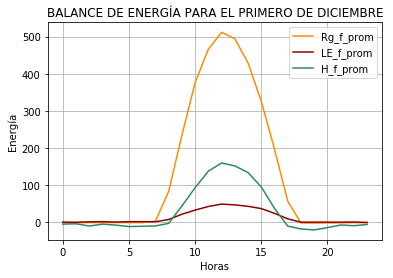

In [347]:
# BALANCE DE ENERGÍA PARA EL MES DE DICIEMBRE
X = h                 
N = np.arange(24)         
Y1 = DICPROM['Rg_f_prom']     
Y2 = DICPROM['LE_f_prom']     
Y3 = DICPROM['H_f_prom']      


plt.plot(Y1, label = 'Rg_f_prom', color = 'darkorange')   
plt.plot(Y2, label = 'LE_f_prom', color = 'darkred')   
plt.plot(Y3, label = 'H_f_prom', color = 'seagreen')   
plt.xlabel("Horas")   
plt.ylabel("Energía")  
plt.legend()
plt.grid()
plt.title('BALANCE DE ENERGÍA PARA EL PRIMERO DE DICIEMBRE')
plt.show()